![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

# Create overview plots to be put on the poster

In [3]:
%load_ext autoreload
%autoreload 2


In [83]:
import os
import geopandas as gpd
import pandas as pd

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geoslurp import GeoslurpManager
from geoslurp.tools.xarray import *
import geoslurp.tools.pandas
import matplotlib as mpl
from shapely.geometry import Point


#local python tools
from common.config import *

In [5]:
get_background()

In [6]:
conf=read_config()
datadir=conf['dataroot']
mediadir=conf['mediaroot']

schema=conf['geoslurpschema']
basins_t="hydroshedbasins"

In [7]:
#load basins files
basinsgpkg=os.path.join(datadir,'hydroshed_csl03_gl_l021.gpkg')

gdfbasins=gpd.read_file(basinsgpkg)

gdfbasins.head()

,PFAF_ID,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,ENDO,COAST,ORDER,SORT,name,geometry
0,111,1030000010,0,1030000010,1030000010,0.0,0.0,236343.2,236343.2,0,1,0,1,SETIT,"MULTIPOLYGON (((39.76528 15.42917, 39.75492 15..."
1,112,1030003990,0,1030003990,1030003990,0.0,0.0,519027.5,519027.5,0,1,0,2,GULF OF ADEN/SOMALIA,"MULTIPOLYGON (((40.81528 14.75417, 40.79561 14..."
2,114,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,0,0,1,3,SHEBELLE,"MULTIPOLYGON (((36.74167 4.06667, 36.74131 4.0..."
3,117,1030008110,0,1030008110,1030008110,0.0,0.0,1040194.7,1040194.7,0,1,0,4,RUFIJI,"MULTIPOLYGON (((40.84444 -2.43333, 40.83833 -2..."
4,122,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,0,0,1,6,ZAMBEZI,"MULTIPOLYGON (((35.2625 -18.23333, 35.26215 -1..."


In [17]:

#load the ERA5 P,ET data
# dsera5=xr.open_dataset(os.path.join(datadir,'precip_evap_flux_monthly.nc'))
dsera5=xr.open_dataset(os.path.join(datadir,conf['ncp-et_comb']))
display(dsera5)

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 276, basin: 124, month: 12)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 2kB 2002-04-01T06:00:00 ... 2025-03-01T...
    expver      (time) <U4 4kB ...
  * basin       (basin) <U39 19kB 'SETIT' ... 'TIBETAN PLATEAU'
    basin_area  (basin) float64 992B ...
  * month       (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    avg_ie      (basin, time) float64 274kB ...
    avg_tprate  (basin, time) float64 274kB ...
    p_mean      (basin) float64 992B ...
    et_mean     (basin) float64 992B ...
    p_cuma      (basin, time) float64 274kB ...
    et_cuma     (basin, time) float64 274kB ...
    p_clima     (basin, month) float64 12kB ...
    et_clima    (basin, month) float64 12kB ...

In [19]:
dsera5.sel(basin=basin).p_mean.item()

12034.228378615231

## Europe zone plot

In [8]:
glofas_comb_file=os.path.join(datadir,conf['glofas-comb'])
dsglofasoutl=xr.open_dataset(glofas_comb_file).set_coords('basins').set_xindex('basins')
display(dsglofasoutl)

/tmp/ipykernel_3949/3981897791.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dsglofasoutl=xr.open_dataset(glofas_comb_file).set_coords('basins').set_xindex('basins')


<xarray.Dataset> Size: 13MB
Dimensions:        (time: 9132, noutlets: 121, month: 12)
Coordinates:
  * time           (time) datetime64[ns] 73kB 2000-01-01 ... 2024-12-31
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
    latitude       (noutlets) float64 968B ...
    longitude      (noutlets) float64 968B ...
    valid_time     (time) datetime64[ns] 73kB ...
  * basins         (noutlets) <U39 19kB 'AMAZONAS' 'AMUR' ... 'ZAMBEZI'
  * month          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: noutlets
Data variables:
    dis24          (time, noutlets) float32 4MB ...
    endo           (noutlets) int64 968B ...
    upstream_area  (noutlets) float64 968B ...
    dis24_mean     (noutlets) float32 484B ...
    dis24_cuma     (noutlets, time) float64 9MB ...
    dis24_clima    (month, noutlets) float32 6kB ...

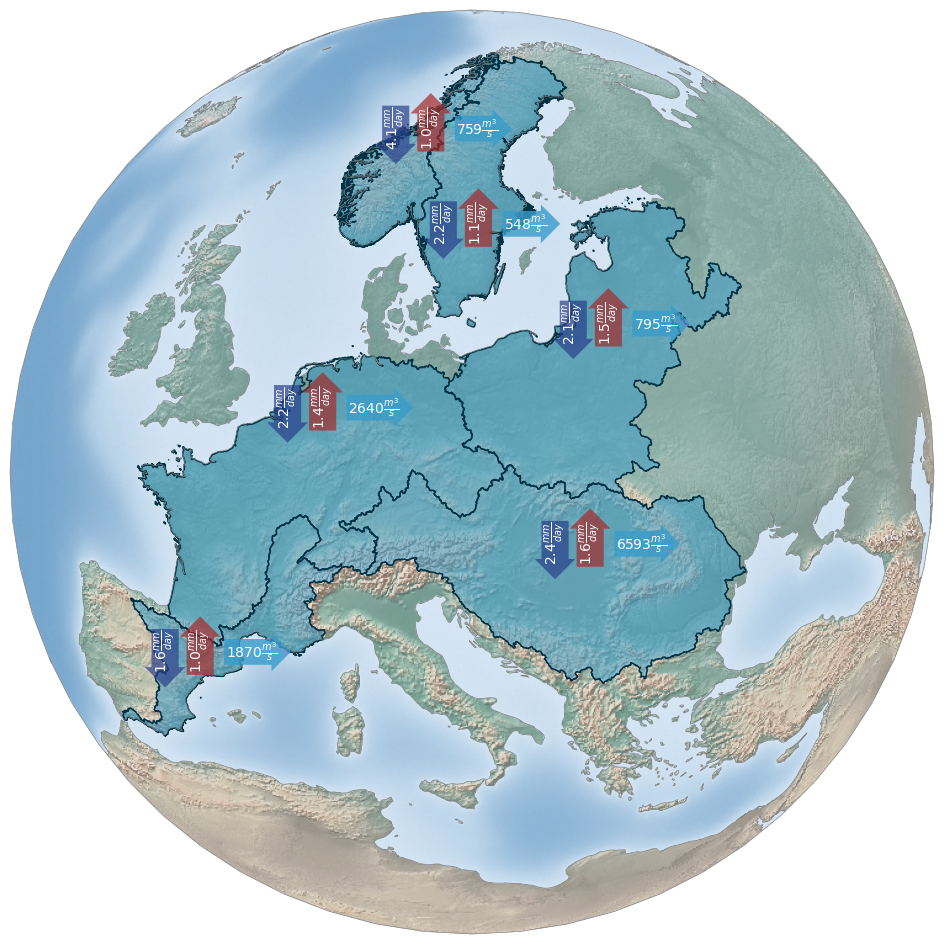

In [85]:
viewheight=1e6
feast_m=0
fnorth_m=0
eucrs=ccrs.NearsidePerspective(central_longitude=15.0, central_latitude=50.0, satellite_height=viewheight, false_easting=feast_m, false_northing=fnorth_m)
gdfbasins_eu=gdfbasins.to_crs(eucrs)

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'
dshift=2e4


fig, ax = plt.subplots(subplot_kw={"projection": eucrs},figsize=(12,12))
# ax = plt.axes(projection=eucrs)
plotcombos={}
for basin in EU_basins:
    plotcombos[basin]={"edgecolor":posterdark,'facecolor':add_alpha(shxarrayblue,0.5)}



pnts=[]
meandis24=[]
centroids=[]
mean_p=[]
mean_et=[]
for basin,props in plotcombos.items():
    #plot GLOFAS Discharge location
    glofas=dsglofasoutl.sel(basins=basin)
    meandis24.append(glofas.dis24.mean('time').item())
    pnts.append(Point(glofas.longitude.item(),glofas.latitude.item()))
    # ax.scatter([glofas.longitude.item()],[glofas.latitude.item()],transform=ccrs.PlateCarree(),color=posterred,zorder=10)
    gdfbasin=gdfbasins_eu[gdfbasins_eu.name==basin]
    ax.add_geometries(gdfbasin.geometry, crs=eucrs, **props)
    
    area=gdfbasin.UP_AREA.iloc[0]
    centroids.append(gdfbasin.geometry.centroid.iloc[0])
    era5scale=86400*1e3/(area*1e6)
    mean_p.append(era5scale*dsera5.sel(basin=basin).p_mean.item())
    mean_et.append(era5scale*dsera5.sel(basin=basin).et_mean.item())
    
    

# ylim=ax.set_ylim()
# xlim=ax.set_xlim()
disscale=2e-3
# pnts=gpd.GeoDataFrame(dict(meandis24=meandis24),geometry=gpd.GeoSeries(pnts,crs=ccrs.Geodetic()).to_crs(eucrs))
centroids=[Point(y,x) for x,y in EU_centroids]
dfpet=gpd.GeoDataFrame(dict(mean_p=mean_p,mean_et=mean_et,meandis24=meandis24),geometry=gpd.GeoSeries(centroids,crs=ccrs.PlateCarree())).to_crs(eucrs)

ax.background_img(name='HypsoReliefWater', resolution='high')
ax.coastlines(color='grey',lw=0.5)
# pnts.plot(ax=ax,zorder=10,facecolor=add_alpha(posterred,0.3),markersize='meandis24')
# for x, y, disch in zip(pnts.geometry.x, pnts.geometry.y, pnts.meandis24):
#     t = ax.text(x, y, f"{int(disch)}"+"$\\frac{m^{3}}{s}$", ha="center", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="round,pad=0.1,rounding_size=0.2",
#                       fc=add_alpha(posterred,0.7), ec="none"))

    # ax.annotate(f"{int(disch)}\n$m^{3}/s$", xy=(x, y), xytext=(0,0), textcoords="offset points",color=posterdark,zorder=12,fontsize=14)
#plot P,ET fluxes close to centroid
for x, y, p,et,disch in zip(dfpet.geometry.x, dfpet.geometry.y, dfpet.mean_p,dfpet.mean_et,dfpet.meandis24):
    t = ax.text(x-dshift, y, f"{p:.1f}"+"$\\frac{mm}{day}$", ha="right", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="larrow,pad=0.1",
                      fc=add_alpha(itcblue,0.7), ec="none"),rotation=90)
    t = ax.text(x+dshift, y, f"{-et:.1f}"+"$\\frac{mm}{day}$", ha="left", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="rarrow,pad=0.1",
                      fc=add_alpha(posterred,0.7), ec="none"),rotation=90)
    t = ax.text(x+8*dshift, y, f"{int(disch)}"+"$\\frac{m^{3}}{s}$", ha="left", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="rarrow,pad=0.1",
                      fc=add_alpha(shxarrayblue,0.8), ec="none"))

  

    





feu_overview=os.path.join(mediadir,'EU_overview.svg')

plt.savefig(feu_overview,transparent=True)
plt.show()


In [86]:
EU_centroids



[(47.44, 20.066),
 (51.869, 5.583),
 (41.705, -0.442),
 (54.98, 22.24),
 (63.702, 9.721),
 (58.983, 14.222)]

## East Africa zone plot

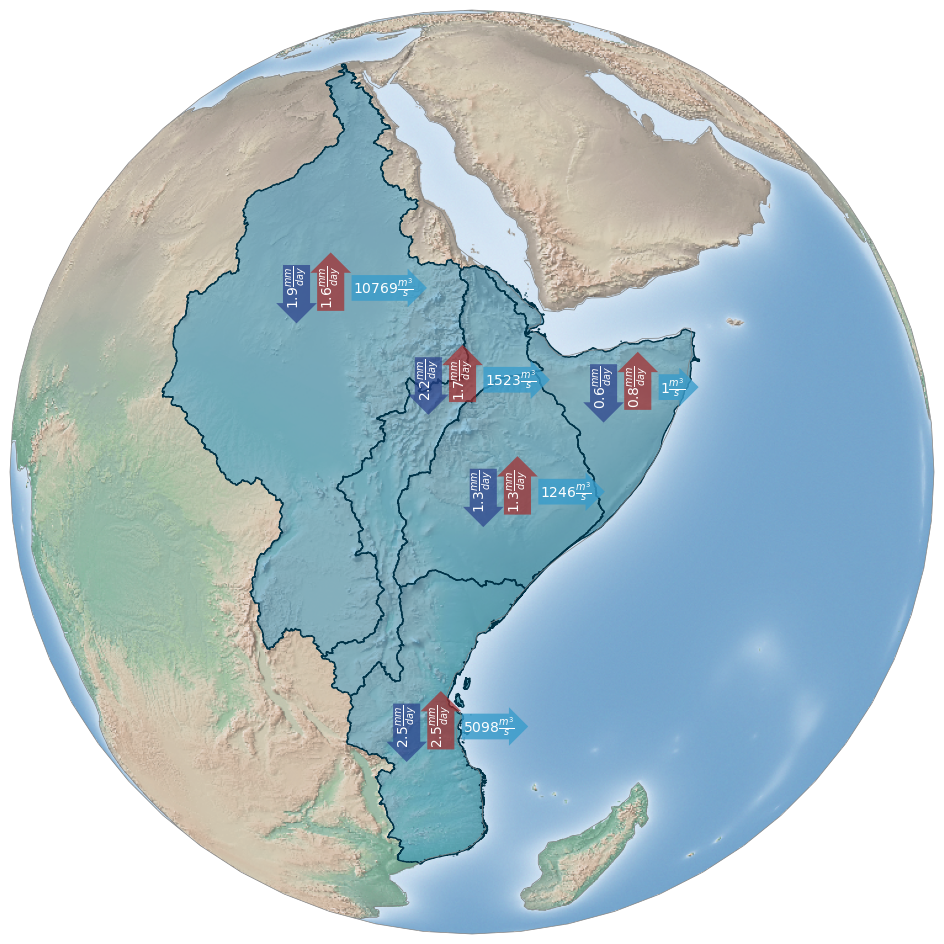

In [90]:
viewheight=2e6
feast_m=0
fnorth_m=0
afcrs=ccrs.NearsidePerspective(central_longitude=40.0, central_latitude=5.0, satellite_height=viewheight, false_easting=feast_m, false_northing=fnorth_m)
gdfbasins_af=gdfbasins.to_crs(afcrs)


mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'


dshift=2.5e4


fig, ax = plt.subplots(subplot_kw={"projection": afcrs},figsize=(12,12))
# ax = plt.axes(projection=eucrs)
plotcombos={}
for basin in AF_basins:
    plotcombos[basin]={"edgecolor":posterdark,'facecolor':add_alpha(shxarrayblue,0.5)}



pnts=[]
meandis24=[]
centroids=[]
mean_p=[]
mean_et=[]
for basin,props in plotcombos.items():
    #plot GLOFAS Discharge location
    glofas=dsglofasoutl.sel(basins=basin)
    meandis24.append(glofas.dis24.mean('time').item())
    pnts.append(Point(glofas.longitude.item(),glofas.latitude.item()))
    # ax.scatter([glofas.longitude.item()],[glofas.latitude.item()],transform=ccrs.PlateCarree(),color=posterred,zorder=10)
    gdfbasin=gdfbasins_af[gdfbasins_af.name==basin]
    ax.add_geometries(gdfbasin.geometry, crs=afcrs, **props)
    
    area=gdfbasin.UP_AREA.iloc[0]
    centroids.append(gdfbasin.geometry.centroid.iloc[0])
    era5scale=86400*1e3/(area*1e6)
    mean_p.append(era5scale*dsera5.sel(basin=basin).p_mean.item())
    mean_et.append(era5scale*dsera5.sel(basin=basin).et_mean.item())
    
    

# ylim=ax.set_ylim()
# xlim=ax.set_xlim()
disscale=2e-3
# pnts=gpd.GeoDataFrame(dict(meandis24=meandis24),geometry=gpd.GeoSeries(pnts,crs=ccrs.Geodetic()).to_crs(eucrs))
centroids=[Point(y,x) for x,y in AF_centroids]
dfpet=gpd.GeoDataFrame(dict(mean_p=mean_p,mean_et=mean_et,meandis24=meandis24),geometry=gpd.GeoSeries(centroids,crs=ccrs.PlateCarree())).to_crs(afcrs)

ax.background_img(name='HypsoReliefWater', resolution='high')
ax.coastlines(color='grey',lw=0.5)
# pnts.plot(ax=ax,zorder=10,facecolor=add_alpha(posterred,0.3),markersize='meandis24')
# for x, y, disch in zip(pnts.geometry.x, pnts.geometry.y, pnts.meandis24):
#     t = ax.text(x, y, f"{int(disch)}"+"$\\frac{m^{3}}{s}$", ha="center", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="round,pad=0.1,rounding_size=0.2",
#                       fc=add_alpha(posterred,0.7), ec="none"))

    # ax.annotate(f"{int(disch)}\n$m^{3}/s$", xy=(x, y), xytext=(0,0), textcoords="offset points",color=posterdark,zorder=12,fontsize=14)
#plot P,ET fluxes close to centroid
for x, y, p,et,disch in zip(dfpet.geometry.x, dfpet.geometry.y, dfpet.mean_p,dfpet.mean_et,dfpet.meandis24):
    t = ax.text(x-dshift, y, f"{p:.1f}"+"$\\frac{mm}{day}$", ha="right", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="larrow,pad=0.1",
                      fc=add_alpha(itcblue,0.7), ec="none"),rotation=90)
    t = ax.text(x+dshift, y, f"{-et:.1f}"+"$\\frac{mm}{day}$", ha="left", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="rarrow,pad=0.1",
                      fc=add_alpha(posterred,0.7), ec="none"),rotation=90)
    t = ax.text(x+8*dshift, y, f"{int(disch)}"+"$\\frac{m^{3}}{s}$", ha="left", va="center", size=10,color='white',zorder=12,bbox=dict(boxstyle="rarrow,pad=0.1",
                      fc=add_alpha(shxarrayblue,0.8), ec="none"))

  

    





faf_overview=os.path.join(mediadir,'AF_overview.svg')

plt.savefig(faf_overview,transparent=True)

#
plt.show()

